In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
dataset = pd.read_csv("dataset_phishing.csv")

In [9]:
dataset

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [10]:
identical_columns = []
for column in dataset.describe().columns:
    if dataset.describe().loc['std',column] == 0 :
        identical_columns.append(column)
identical_columns

['nb_or',
 'ratio_nullHyperlinks',
 'ratio_intRedirection',
 'ratio_intErrors',
 'submit_email',
 'sfh']

In [11]:
for column in identical_columns:
    del dataset[column]

In [12]:
dataset['target'] = pd.get_dummies(dataset['status'])['legitimate'].astype('int')
del dataset['status']

In [13]:
# Sepratating & assigning features and target columns to X & y
y = dataset['target']
X = dataset.drop('url',axis=1)
X = X.drop('target',axis=1)
X.shape, y.shape

((11430, 81), (11430,))

In [14]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
X_train.shape, X_test.shape

((9144, 81), (2286, 81))

In [16]:
# Convert the values to 0 and 1
from sklearn import preprocessing
X_train = preprocessing.MinMaxScaler().fit_transform(X_train.values)
X_test =  preprocessing.MinMaxScaler().fit_transform(X_test.values)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
input_shape = [X_train[1].shape]
print("Input shape is ", input_shape)

Input shape is  [(81, 1)]


In [88]:
filter_size = 16 # 
kernel_size = 1
activation = 'tanh'
drop_out = 0.3
units = 128

from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.BatchNormalization(input_shape=(81, 1)),
#     layers.Conv1D(filters=4*filter_size,kernel_size=kernel_size),
#     layers.BatchNormalization(),
#     layers.Dropout(drop_out),
    
#     layers.Conv1D(filters=2*filter_size,kernel_size=kernel_size),
#     layers.BatchNormalization(),
#     layers.Dropout(drop_out),

#     layers.Conv1D(filters=2*filter_size,kernel_size=kernel_size),
#     layers.Dropout(drop_out),
#     layers.BatchNormalization(),
    
    layers.Conv1D(filters=filter_size,kernel_size=kernel_size),
    layers.Dropout(drop_out),
    layers.BatchNormalization(),
    

    layers.Flatten(), # flatten out the layers
    layers.Dense(units=units,activation=activation),
    layers.Dropout(drop_out),
    layers.BatchNormalization(),
    
#     layers.Dense(64,activation=activation),
#     layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential_351"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1396 (Ba (None, 81, 1)             4         
_________________________________________________________________
conv1d_356 (Conv1D)          (None, 81, 16)            32        
_________________________________________________________________
dropout_706 (Dropout)        (None, 81, 16)            0         
_________________________________________________________________
batch_normalization_1397 (Ba (None, 81, 16)            64        
_________________________________________________________________
flatten_351 (Flatten)        (None, 1296)              0         
_________________________________________________________________
dense_1041 (Dense)           (None, 128)               166016    
_________________________________________________________________
dropout_707 (Dropout)        (None, 128)            

In [89]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['binary_accuracy',keras.metrics.Precision(),keras.metrics.Recall()],
)

In [90]:
# stop = keras.callbacks.EarlyStopping(
#     patience=20,
#     min_delta=0.0001,
#     restore_best_weights=True,
# )
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=50,
#     callbacks=[stop],
)

Epoch 1/50
72/72 [==============================] - 2s 14ms/step - loss: 0.3122 - binary_accuracy: 0.8684 - precision_5: 0.8563 - recall_5: 0.8821 - val_loss: 0.3645 - val_binary_accuracy: 0.8718 - val_precision_5: 0.9792 - val_recall_5: 0.7656
Epoch 2/50
72/72 [==============================] - 1s 9ms/step - loss: 0.1858 - binary_accuracy: 0.9315 - precision_5: 0.9224 - recall_5: 0.9392 - val_loss: 0.2696 - val_binary_accuracy: 0.9016 - val_precision_5: 0.9768 - val_recall_5: 0.8272
Epoch 3/50
72/72 [==============================] - 1s 8ms/step - loss: 0.1761 - binary_accuracy: 0.9347 - precision_5: 0.9245 - recall_5: 0.9448 - val_loss: 0.1696 - val_binary_accuracy: 0.9374 - val_precision_5: 0.9540 - val_recall_5: 0.9222
Epoch 4/50
72/72 [==============================] - 1s 9ms/step - loss: 0.1765 - binary_accuracy: 0.9340 - precision_5: 0.9263 - recall_5: 0.9401 - val_loss: 0.1668 - val_binary_accuracy: 0.9374 - val_precision_5: 0.9638 - val_recall_5: 0.9119
Epoch 5/50
72/72 [=====

72/72 [==============================] - 1s 10ms/step - loss: 0.0967 - binary_accuracy: 0.9628 - precision_5: 0.9592 - recall_5: 0.9663 - val_loss: 0.1163 - val_binary_accuracy: 0.9619 - val_precision_5: 0.9608 - val_recall_5: 0.9649
Epoch 35/50
72/72 [==============================] - 1s 10ms/step - loss: 0.0837 - binary_accuracy: 0.9682 - precision_5: 0.9649 - recall_5: 0.9715 - val_loss: 0.1129 - val_binary_accuracy: 0.9606 - val_precision_5: 0.9639 - val_recall_5: 0.9589
Epoch 36/50
72/72 [==============================] - 1s 9ms/step - loss: 0.0998 - binary_accuracy: 0.9631 - precision_5: 0.9655 - recall_5: 0.9626 - val_loss: 0.1204 - val_binary_accuracy: 0.9593 - val_precision_5: 0.9646 - val_recall_5: 0.9555
Epoch 37/50
72/72 [==============================] - 1s 9ms/step - loss: 0.0858 - binary_accuracy: 0.9726 - precision_5: 0.9742 - recall_5: 0.9710 - val_loss: 0.1133 - val_binary_accuracy: 0.9611 - val_precision_5: 0.9631 - val_recall_5: 0.9607
Epoch 38/50
72/72 [===========

In [92]:
history_df

,loss,binary_accuracy,precision_5,recall_5,val_loss,val_binary_accuracy,val_precision_5,val_recall_5
0,0.246070,0.902668,0.896529,0.909151,0.364507,0.871828,0.979212,0.765612
1,0.194205,0.927603,0.924203,0.930708,0.269600,0.901575,0.976768,0.827203
2,0.175770,0.935258,0.929409,0.941267,0.169613,0.937445,0.953982,0.922156
3,0.168812,0.937336,0.931379,0.943467,0.166770,0.937445,0.963834,0.911891
4,0.163095,0.939414,0.938296,0.939947,0.147285,0.944007,0.950649,0.939264
5,0.153506,0.944991,0.941665,0.948086,0.137859,0.952318,0.947635,0.959795
6,0.144261,0.947178,0.944432,0.949626,0.134179,0.951444,0.954467,0.950385
7,0.143596,0.945101,0.942838,0.946986,0.142331,0.948381,0.963813,0.934132
8,0.135806,0.949803,0.946667,0.952706,0.128460,0.953193,0.956186,0.952096
9,0.130994,0.952428,0.949683,0.954905,0.131342,0.952756,0.941715,0.967494


Best Validation Loss: 0.1108
Best Validation Accuracy: 0.9641


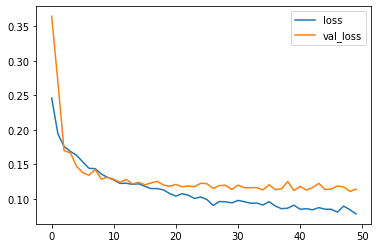

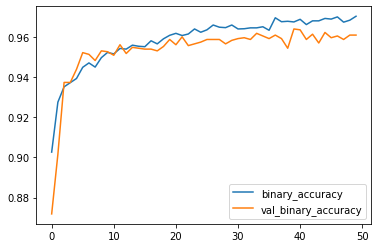

In [94]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 0
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [99]:
f1 = (2 * history_df['val_recall_5'].max() * history_df['val_precision_5'].max())/ (history_df['val_recall_5'].max() + history_df['val_precision_5'].max())
f1

0.9746145617087987

In [100]:
history_df['val_recall_5'].max(),history_df['val_precision_5'].max()

(0.970059871673584, 0.97921222448349)

----

In [19]:
filter_sizes = [8,16,32,64,128,256]
kernel_sizes = [1,2,3,5,10]
activations = ['relu','tanh']
drop_out = 0.3
units_list = [8,16,32,64,128,256]
Best_acc = []

from tensorflow import keras
from tensorflow.keras import layers
count = 0
for filter_size in filter_sizes:
    for kernel_size in kernel_sizes:
        for units in units_list:
            for activation in activations:
                count+=1
                print("Hyperparameter", count, ": filter size:", filter_size, " kernel size:", kernel_size, " units:", units, " activation:", activation)
                model = keras.Sequential([
                    layers.BatchNormalization(input_shape=(81, 1)),
                    layers.Conv1D(filters=filter_size,kernel_size=kernel_size),
                    layers.Dropout(drop_out),
                    layers.BatchNormalization(),

                    layers.Flatten(), # flatten out the layers
                    layers.Dense(units=2*units,activation=activation),
                    layers.Dropout(drop_out),
                    layers.BatchNormalization(),

                    layers.Dense(units=units,activation=activation),
                    layers.BatchNormalization(),
                    layers.Dense(1, activation='sigmoid'),
                ])

                opt = keras.optimizers.Adam(learning_rate=0.001)
                model.compile(
                    optimizer=opt,
                    loss='binary_crossentropy',
                    metrics=['binary_accuracy'],
                )

                history = model.fit(
                    X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=128,
                    epochs=50,
                    verbose=0
                )

                history_df = pd.DataFrame(history.history)
#                 # Start the plot at epoch 0
#                 history_df.loc[0:, ['loss', 'val_loss']].plot(title="Loss Plot with hyperparameter "+str(count))
#                 history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Acc Plot with hyperparameter "+str(count))
                Best_acc.append(history_df['val_binary_accuracy'].max())
    
                print(("Best Validation Loss: {:0.4f}" +\
                      "\nBest Validation Accuracy: {:0.4f}")\
                      .format(history_df['val_loss'].min(), 
                              history_df['val_binary_accuracy'].max()))

Hyperparameter 1 : filter size: 8  kernel size: 1  units: 8  activation: relu
Best Validation Loss: 0.1231
Best Validation Accuracy: 0.9567
Hyperparameter 2 : filter size: 8  kernel size: 1  units: 8  activation: tanh
Best Validation Loss: 0.1330
Best Validation Accuracy: 0.9541
Hyperparameter 3 : filter size: 8  kernel size: 1  units: 16  activation: relu
Best Validation Loss: 0.1209
Best Validation Accuracy: 0.9593
Hyperparameter 4 : filter size: 8  kernel size: 1  units: 16  activation: tanh
Best Validation Loss: 0.1300
Best Validation Accuracy: 0.9545
Hyperparameter 5 : filter size: 8  kernel size: 1  units: 32  activation: relu
Best Validation Loss: 0.1180
Best Validation Accuracy: 0.9602
Hyperparameter 6 : filter size: 8  kernel size: 1  units: 32  activation: tanh
Best Validation Loss: 0.1160
Best Validation Accuracy: 0.9619
Hyperparameter 7 : filter size: 8  kernel size: 1  units: 64  activation: relu
Best Validation Loss: 0.1220
Best Validation Accuracy: 0.9593
Hyperparameter 

Best Validation Loss: 0.1154
Best Validation Accuracy: 0.9650
Hyperparameter 59 : filter size: 16  kernel size: 1  units: 256  activation: relu
Best Validation Loss: 0.1239
Best Validation Accuracy: 0.9624
Hyperparameter 60 : filter size: 16  kernel size: 1  units: 256  activation: tanh
Best Validation Loss: 0.1176
Best Validation Accuracy: 0.9641
Hyperparameter 61 : filter size: 16  kernel size: 3  units: 8  activation: relu
Best Validation Loss: 0.1240
Best Validation Accuracy: 0.9606
Hyperparameter 62 : filter size: 16  kernel size: 3  units: 8  activation: tanh
Best Validation Loss: 0.1373
Best Validation Accuracy: 0.9536
Hyperparameter 63 : filter size: 16  kernel size: 3  units: 16  activation: relu
Best Validation Loss: 0.1251
Best Validation Accuracy: 0.9567
Hyperparameter 64 : filter size: 16  kernel size: 3  units: 16  activation: tanh
Best Validation Loss: 0.1213
Best Validation Accuracy: 0.9584
Hyperparameter 65 : filter size: 16  kernel size: 3  units: 32  activation: relu

Best Validation Loss: 0.1266
Best Validation Accuracy: 0.9584
Hyperparameter 117 : filter size: 32  kernel size: 3  units: 128  activation: relu
Best Validation Loss: 0.1235
Best Validation Accuracy: 0.9619
Hyperparameter 118 : filter size: 32  kernel size: 3  units: 128  activation: tanh
Best Validation Loss: 0.1201
Best Validation Accuracy: 0.9602
Hyperparameter 119 : filter size: 32  kernel size: 3  units: 256  activation: relu
Best Validation Loss: 0.1278
Best Validation Accuracy: 0.9615
Hyperparameter 120 : filter size: 32  kernel size: 3  units: 256  activation: tanh
Best Validation Loss: 0.1229
Best Validation Accuracy: 0.9611
Hyperparameter 121 : filter size: 32  kernel size: 5  units: 8  activation: relu
Best Validation Loss: 0.1338
Best Validation Accuracy: 0.9536
Hyperparameter 122 : filter size: 32  kernel size: 5  units: 8  activation: tanh
Best Validation Loss: 0.1438
Best Validation Accuracy: 0.9501
Hyperparameter 123 : filter size: 32  kernel size: 5  units: 16  activat

Best Validation Loss: 0.1301
Best Validation Accuracy: 0.9589
Hyperparameter 174 : filter size: 64  kernel size: 5  units: 32  activation: tanh
Best Validation Loss: 0.1299
Best Validation Accuracy: 0.9567
Hyperparameter 175 : filter size: 64  kernel size: 5  units: 64  activation: relu
Best Validation Loss: 0.1298
Best Validation Accuracy: 0.9598
Hyperparameter 176 : filter size: 64  kernel size: 5  units: 64  activation: tanh
Best Validation Loss: 0.1286
Best Validation Accuracy: 0.9571
Hyperparameter 177 : filter size: 64  kernel size: 5  units: 128  activation: relu
Best Validation Loss: 0.1265
Best Validation Accuracy: 0.9606
Hyperparameter 178 : filter size: 64  kernel size: 5  units: 128  activation: tanh
Best Validation Loss: 0.1227
Best Validation Accuracy: 0.9584
Hyperparameter 179 : filter size: 64  kernel size: 5  units: 256  activation: relu
Best Validation Loss: 0.1240
Best Validation Accuracy: 0.9619
Hyperparameter 180 : filter size: 64  kernel size: 5  units: 256  activ

Best Validation Loss: 0.1652
Best Validation Accuracy: 0.9418
Hyperparameter 231 : filter size: 128  kernel size: 10  units: 16  activation: relu
Best Validation Loss: 0.1316
Best Validation Accuracy: 0.9567
Hyperparameter 232 : filter size: 128  kernel size: 10  units: 16  activation: tanh
Best Validation Loss: 0.1507
Best Validation Accuracy: 0.9484
Hyperparameter 233 : filter size: 128  kernel size: 10  units: 32  activation: relu
Best Validation Loss: 0.1276
Best Validation Accuracy: 0.9589
Hyperparameter 234 : filter size: 128  kernel size: 10  units: 32  activation: tanh
Best Validation Loss: 0.1454
Best Validation Accuracy: 0.9510
Hyperparameter 235 : filter size: 128  kernel size: 10  units: 64  activation: relu
Best Validation Loss: 0.1374
Best Validation Accuracy: 0.9580
Hyperparameter 236 : filter size: 128  kernel size: 10  units: 64  activation: tanh
Best Validation Loss: 0.1422
Best Validation Accuracy: 0.9532
Hyperparameter 237 : filter size: 128  kernel size: 10  units:

KeyboardInterrupt: 

In [53]:
filter_sizes = [256] # 
kernel_sizes = [1,2,3,5,10]
activations = ['relu','tanh']
drop_out = 0.3
units_list = [8,16,32,64,128,256]
Best_acc2 = []

from tensorflow import keras
from tensorflow.keras import layers
count = 0
for filter_size in filter_sizes:
    for kernel_size in kernel_sizes:
        for units in units_list:
            for activation in activations:
                count+=1
                print("Hyperparameter", count, ": filter size:", filter_size, " kernel size:", kernel_size, " units:", units, " activation:", activation)
                model = keras.Sequential([
                    layers.BatchNormalization(input_shape=(81, 1)),
                    layers.Conv1D(filters=filter_size,kernel_size=kernel_size),
                    layers.Dropout(drop_out),
                    layers.BatchNormalization(),

                    layers.Flatten(), # flatten out the layers
                    layers.Dense(units=2*units,activation=activation),
                    layers.Dropout(drop_out),
                    layers.BatchNormalization(),

                    layers.Dense(units=units,activation=activation),
                    layers.BatchNormalization(),
                    layers.Dense(1, activation='sigmoid'),
                ])

                opt = keras.optimizers.Adam(learning_rate=0.001)
                model.compile(
                    optimizer=opt,
                    loss='binary_crossentropy',
                    metrics=['binary_accuracy'],
                )

                history = model.fit(
                    X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=128,
                    epochs=50,
                    verbose=0
                )

                history_df = pd.DataFrame(history.history)
#                 # Start the plot at epoch 0
#                 history_df.loc[0:, ['loss', 'val_loss']].plot(title="Loss Plot with hyperparameter "+str(count))
#                 history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Acc Plot with hyperparameter "+str(count))
                Best_acc2.append(history_df['val_binary_accuracy'].max())
    
                print(("Best Validation Loss: {:0.4f}" +\
                      "\nBest Validation Accuracy: {:0.4f}")\
                      .format(history_df['val_loss'].min(), 
                              history_df['val_binary_accuracy'].max()))

Hyperparameter 1 : filter size: 256  kernel size: 1  units: 8  activation: relu
Best Validation Loss: 0.1316
Best Validation Accuracy: 0.9545
Hyperparameter 2 : filter size: 256  kernel size: 1  units: 8  activation: tanh
Best Validation Loss: 0.1561
Best Validation Accuracy: 0.9440
Hyperparameter 3 : filter size: 256  kernel size: 1  units: 16  activation: relu
Best Validation Loss: 0.1274
Best Validation Accuracy: 0.9541
Hyperparameter 4 : filter size: 256  kernel size: 1  units: 16  activation: tanh
Best Validation Loss: 0.1483
Best Validation Accuracy: 0.9475
Hyperparameter 5 : filter size: 256  kernel size: 1  units: 32  activation: relu
Best Validation Loss: 0.1372
Best Validation Accuracy: 0.9584
Hyperparameter 6 : filter size: 256  kernel size: 1  units: 32  activation: tanh
Best Validation Loss: 0.1454
Best Validation Accuracy: 0.9497
Hyperparameter 7 : filter size: 256  kernel size: 1  units: 64  activation: relu
Best Validation Loss: 0.1290
Best Validation Accuracy: 0.9615
H

Best Validation Loss: 0.1491
Best Validation Accuracy: 0.9484
Hyperparameter 59 : filter size: 256  kernel size: 10  units: 256  activation: relu
Best Validation Loss: 0.1293
Best Validation Accuracy: 0.9584
Hyperparameter 60 : filter size: 256  kernel size: 10  units: 256  activation: tanh
Best Validation Loss: 0.1492
Best Validation Accuracy: 0.9484


In [54]:
max(Best_acc2)

0.9636920094490051